In [2]:
# importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# importing the dataset
dataset = pd.read_csv('D:/4th year Semester 01/ML/Assignment 02/ML_Assignment2_IT19135830_IT19190808_IT19136134_IT19146652/insurance.csv')
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [35]:
# getting the legth of the dataset
len(dataset)

1338

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
# getting the rows and column count
dataset.shape

(1338, 7)

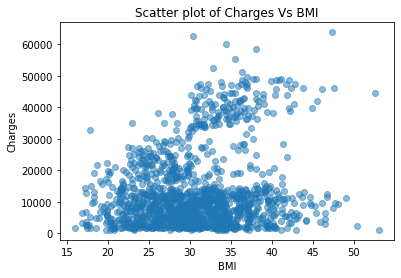

In [39]:
# finding the correlation of hospital charges with BMI
plt.scatter(dataset['bmi'], dataset['charges'], alpha=0.5)
plt.title('Scatter plot of Charges Vs BMI')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

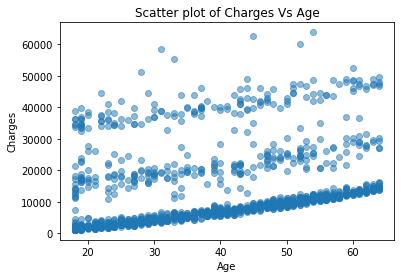

In [40]:
# finding the correlation of hospital charges with Age
plt.scatter(dataset['age'], dataset['charges'], alpha=0.5)
plt.title('Scatter plot of Charges Vs Age')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Text(0, 0.5, 'charges')

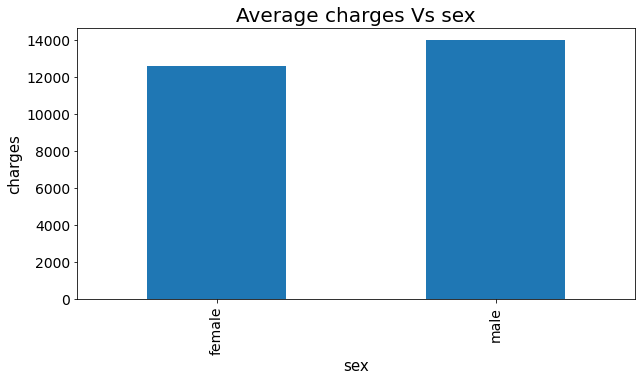

In [41]:
ax = dataset.groupby(['sex'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs sex", fontsize = 20)

ax.set_xlabel("sex", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

In [49]:
# changing catergorical variable sex into dummy variables
dataset['gender'] = np.where(dataset['sex'] == 'male', 1, 0)

dataset.drop(columns=['sex'], axis=1, inplace = True)

dataset.head()

,age,sex,bmi,children,smoker,region,charges,gender
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,0
2,28,1,33.000,3,0,southeast,4449.46200,0
3,33,1,22.705,0,0,northwest,21984.47061,0
4,32,1,28.880,0,0,northwest,3866.85520,0


In [43]:
dataset.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

Text(0, 0.5, 'charges')

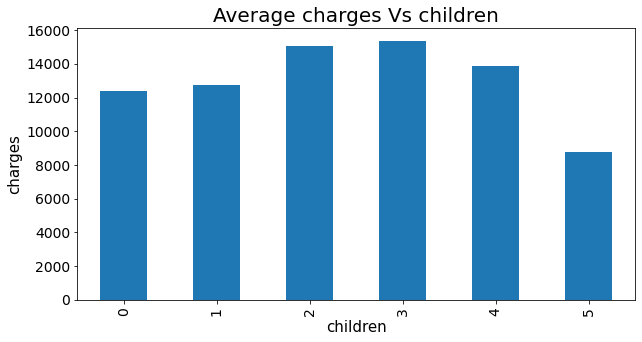

In [44]:
ax = dataset.groupby(['children'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs children", fontsize = 20)

ax.set_xlabel("children", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

Text(0, 0.5, 'charges')

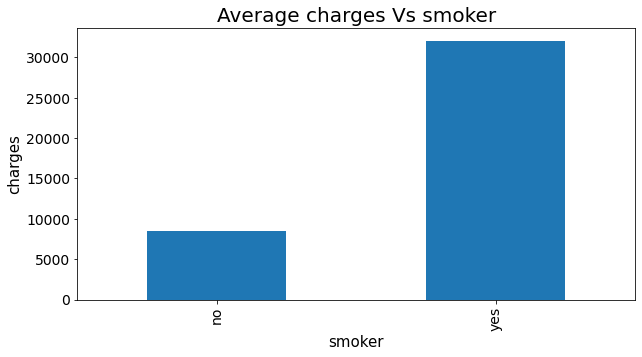

In [45]:
ax = dataset.groupby(['smoker'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs smoker", fontsize = 20)

ax.set_xlabel("smoker", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

In [46]:
# changing catergorical variable smoker into dummy variables
dataset['smoker profile'] = np.where(dataset['smoker'] == 'yes', 1, 0)

dataset.drop(columns=['smoker'], axis=1, inplace = True)

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


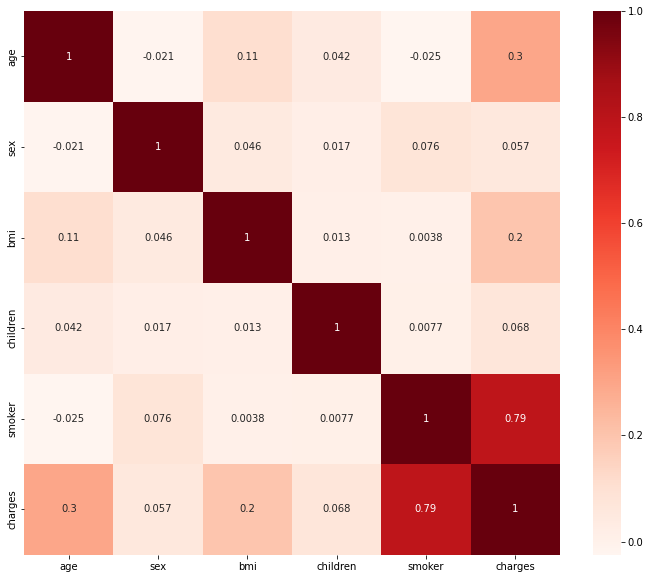

In [47]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
corr_charges=cor['charges'].sort_values(ascending=False)
print(corr_charges)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
Name: charges, dtype: float64
